<a href="https://colab.research.google.com/github/NithishTU/CN-Chat-app-Project/blob/main/TDL_PROJECT_SAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import numpy as np
import tensorflow as tf

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MarsLanderPolicy(nn.Module):
    def __init__(self):
        super(MarsLanderPolicy, self).__init__()

        self.policy_net = nn.Sequential(
            nn.Linear(in_features=-6.22188151e-02, out_features=-9.03800875e-02),  # Adjust input and hidden size
            nn.ReLU(),
            nn.Linear(in_features=-0.03082988, out_features=-0.02541942),  # Adjust hidden size
            nn.ReLU(),
        )

        self.action_net = nn.Linear(in_features=-0.07862598, out_features=-0.01890517)  # Adjust hidden and output size

    def forward(self, observation):
        policy_net_output = self.policy_net(observation)
        action_net_output = self.action_net(policy_net_output)
        return action_net_output


In [26]:
class MeanEpisodeReward:
    def __init__(self, buffer_size=100):
        self.buffer_size = buffer_size
        self.rewards_buffer = []
        self.mean_episode_reward = 0.0

    def update(self, episode_reward):
        self.rewards_buffer.append(episode_reward)

        # Keep only the last 'buffer_size' rewards in the buffer
        if len(self.rewards_buffer) > self.buffer_size:
            self.rewards_buffer = self.rewards_buffer[-self.buffer_size:]

        # Update the mean episode reward
        self.mean_episode_reward = sum(self.rewards_buffer) / len(self.rewards_buffer)

    def get_mean_episode_reward(self):
        return self.mean_episode_reward


In [27]:
import gym

# Assuming you have a gym environment, replace 'your_environment_name' with the actual environment you're using
env = gym.make('CartPole-v1')

def train_agent():
    observation = env.reset()
    total_reward = 0

    while True:
        # Replace the following line with your actual action selection logic
        action = your_policy(observation)

        # Take the chosen action and observe the next state and reward
        next_observation, reward, done, _ = env.step(action)

        # Replace the following line with your actual learning/update logic
        your_update_method(observation, action, reward, next_observation, done)

        total_reward += reward
        observation = next_observation

        if done:
            break

    return total_reward

# Define your_policy and your_update_method according to the specific algorithm you are using
def your_policy(observation):
    action = np.random.choice(env.action_space.n)
    return action

import numpy as np

# Define Q-table
q_table = {}

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor

def your_policy(observation):
    # Example: Epsilon-greedy policy for discrete action space
    epsilon = 0.1
    if np.random.rand() < epsilon:
        action = np.random.choice(env.action_space.n)
    else:
        action = np.argmax(your_q_function(observation))
    return action

def your_q_function(observation):
    # Initialize Q-values for the new state if not present in the Q-table
    if tuple(observation) not in q_table:
        q_table[tuple(observation)] = np.zeros(env.action_space.n)
    return q_table[tuple(observation)]

def update_your_q_function(observation, action, new_q_value):
    q_table[tuple(observation)][action] = new_q_value

def your_update_method(observation, action, reward, next_observation, done):
    # Q-learning update
    current_q_value = your_q_function(observation)[action]
    next_q_max = np.max(your_q_function(next_observation))

    target = reward + gamma * next_q_max * (1 - done)  # Discounted cumulative reward

    # Update Q-value using a simple learning rate
    new_q_value = (1 - alpha) * current_q_value + alpha * target

    # Update Q-function with the new Q-value
    update_your_q_function(observation, action, new_q_value)



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [28]:
import gym
import numpy as np

# Define your reinforcement learning agent functions (your_policy, your_update_method, etc.) here

def simulate_agent(env, num_episodes):
    for episode in range(num_episodes):
        observation = env.reset()
        total_reward = 0

        while True:
            # Choose action using your policy
            action = your_policy(observation)

            # Take the chosen action and observe the next state and reward
            next_observation, reward, done, _ = env.step(action)

            # Update the agent based on the observed experience
            your_update_method(observation, action, reward, next_observation, done)

            total_reward += reward
            observation = next_observation

            if done:
                break

        print(f"Episode {episode + 1}, Total Reward: {total_reward}")

# Define your OpenAI Gym environment (replace 'CartPole-v1' with your chosen environment)
env = gym.make('CartPole-v1')

# Set the number of episodes for simulation
num_episodes = 100

# Run the simulation
simulate_agent(env, num_episodes)

# Close the environment after the simulation
env.close()


Episode 1, Total Reward: 10.0
Episode 2, Total Reward: 9.0
Episode 3, Total Reward: 8.0
Episode 4, Total Reward: 10.0
Episode 5, Total Reward: 11.0
Episode 6, Total Reward: 9.0
Episode 7, Total Reward: 10.0
Episode 8, Total Reward: 9.0
Episode 9, Total Reward: 10.0
Episode 10, Total Reward: 9.0
Episode 11, Total Reward: 9.0
Episode 12, Total Reward: 9.0
Episode 13, Total Reward: 10.0
Episode 14, Total Reward: 9.0
Episode 15, Total Reward: 8.0
Episode 16, Total Reward: 8.0
Episode 17, Total Reward: 13.0
Episode 18, Total Reward: 10.0
Episode 19, Total Reward: 10.0
Episode 20, Total Reward: 11.0
Episode 21, Total Reward: 9.0
Episode 22, Total Reward: 10.0
Episode 23, Total Reward: 9.0
Episode 24, Total Reward: 10.0
Episode 25, Total Reward: 12.0
Episode 26, Total Reward: 11.0
Episode 27, Total Reward: 9.0
Episode 28, Total Reward: 10.0
Episode 29, Total Reward: 9.0
Episode 30, Total Reward: 12.0
Episode 31, Total Reward: 8.0
Episode 32, Total Reward: 9.0
Episode 33, Total Reward: 9.0
Epi

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1, Total Reward: 10.0
Episode 2, Total Reward: 11.0
Episode 3, Total Reward: 11.0
Episode 4, Total Reward: 10.0
Episode 5, Total Reward: 12.0
Episode 6, Total Reward: 10.0
Episode 7, Total Reward: 9.0
Episode 8, Total Reward: 10.0
Episode 9, Total Reward: 12.0
Episode 10, Total Reward: 10.0
Episode 11, Total Reward: 10.0
Episode 12, Total Reward: 11.0
Episode 13, Total Reward: 12.0
Episode 14, Total Reward: 10.0
Episode 15, Total Reward: 10.0
Episode 16, Total Reward: 10.0
Episode 17, Total Reward: 9.0
Episode 18, Total Reward: 9.0
Episode 19, Total Reward: 11.0
Episode 20, Total Reward: 10.0
Episode 21, Total Reward: 9.0
Episode 22, Total Reward: 9.0
Episode 23, Total Reward: 11.0
Episode 24, Total Reward: 9.0
Episode 25, Total Reward: 11.0
Episode 26, Total Reward: 10.0
Episode 27, Total Reward: 9.0
Episode 28, Total Reward: 11.0
Episode 29, Total Reward: 9.0
Episode 30, Total Reward: 9.0
Episode 31, Total Reward: 10.0
Episode 32, Total Reward: 15.0
Episode 33, Total Reward: 

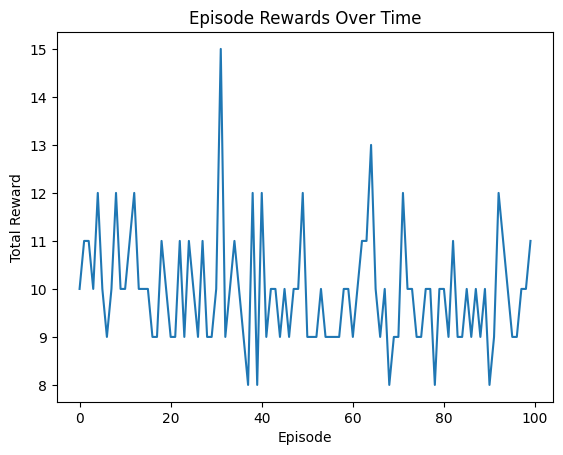

In [29]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Define your reinforcement learning agent functions (your_policy, your_update_method, etc.) here

def simulate_agent(env, num_episodes):
    episode_rewards = []

    for episode in range(num_episodes):
        observation = env.reset()
        total_reward = 0

        while True:
            # Choose action using your policy
            action = your_policy(observation)

            # Take the chosen action and observe the next state and reward
            next_observation, reward, done, _ = env.step(action)

            # Update the agent based on the observed experience
            your_update_method(observation, action, reward, next_observation, done)

            total_reward += reward
            observation = next_observation

            if done:
                break

        episode_rewards.append(total_reward)
        print(f"Episode {episode + 1}, Total Reward: {total_reward}")

    return episode_rewards

# Define OpenAI Gym Environment (replace 'CartPole-v1' with your chosen environment)
env = gym.make('CartPole-v1')

# Set the number of episodes for simulation
num_episodes = 100

# Run the simulation and get episode rewards
episode_rewards = simulate_agent(env, num_episodes)

# Close the environment after the simulation
env.close()

# Plot the episode rewards
plt.plot(episode_rewards)
plt.title('Episode Rewards Over Time')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()


In [30]:
import gym

# Create the MarsLander environment
env = gym.make('CartPole-v1')

# Reset the environment to get the initial observation
observation = env.reset()

# Perform some actions in the environment and render the graphics
for _ in range(1000):  # Adjust the number of steps as needed
    # Replace this with your action selection logic
    action = env.action_space.sample()

    # Take the chosen action and observe the next state and reward
    next_observation, reward, done, _ = env.step(action)

    # Render the environment to visualize the movement
    env.render()

    if done:
        break

# Close the environment when done
env.close()


/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [31]:
import gym
import numpy as np

# Function to collect data for altitude and velocity using reinforcement learning
def collect_data(env, num_episodes):
    data = []

    for episode in range(num_episodes):
        observation = env.reset()
        episode_data = []

        while True:
            # Choose action using a random policy for data collection
            action = env.action_space.sample()

            # Take the chosen action and observe the next state and reward
            next_observation, reward, done, _ = env.step(action)

            # Store altitude and velocity data along with action
            altitude, velocity = observation[:2]
            episode_data.append((altitude, velocity, action))

            observation = next_observation

            if done:
                data.append(episode_data)
                break

    return data

# Create the LunarLander environment
env = gym.make('CartPole-v1')

# Set the number of episodes for data collection
num_episodes = 100

# Collect data for altitude and velocity
altitude_velocity_data = collect_data(env, num_episodes)

# Close the environment after data collection
env.close()

# Print a sample of collected data
for episode in range(3):
    print(f"Episode {episode + 1}:")
    for step in range(len(altitude_velocity_data[episode])):
        altitude, velocity, action = altitude_velocity_data[episode][step]
        print(f"Step {step + 1}: Altitude={altitude:.2f}, Velocity={velocity:.2f}, Action={action}")
def calculate_reward(altitude, velocity, action):
    # Define target altitude and safe landing velocity thresholds
    target_altitude = 0  # Desired altitude for landing
    safe_landing_velocity = 0  # Maximum allowed vertical velocity for safe landing

    # Define reward parameters
    reward_altitude = 100  # Reward per unit altitude close to target altitude
    reward_velocity = 10  # Reward per unit decrease in vertical velocity
    reward_landing = 1000  # Reward for successful landing
    penalty_crash = -1000  # Penalty for crashing

    # Calculate reward based on altitude and velocity
    altitude_reward = reward_altitude * (1 - abs(altitude - target_altitude))
    velocity_reward = reward_velocity * max(0, 1 - abs(velocity) / safe_landing_velocity)

    # Check if the lander has landed safely or crashed
    if altitude <= 0 and abs(velocity) <= safe_landing_velocity:
        return altitude_reward + velocity_reward + reward_landing
    elif altitude <= 0:
        return penalty_crash
    else:
        return altitude_reward + velocity_reward


Episode 1:
Step 1: Altitude=-0.05, Velocity=-0.02, Action=1
Step 2: Altitude=-0.05, Velocity=0.18, Action=0
Step 3: Altitude=-0.05, Velocity=-0.02, Action=1
Step 4: Altitude=-0.05, Velocity=0.18, Action=1
Step 5: Altitude=-0.04, Velocity=0.37, Action=0
Step 6: Altitude=-0.04, Velocity=0.18, Action=1
Step 7: Altitude=-0.03, Velocity=0.37, Action=0
Step 8: Altitude=-0.02, Velocity=0.18, Action=0
Step 9: Altitude=-0.02, Velocity=-0.01, Action=1
Step 10: Altitude=-0.02, Velocity=0.18, Action=0
Step 11: Altitude=-0.02, Velocity=-0.01, Action=0
Step 12: Altitude=-0.02, Velocity=-0.21, Action=1
Step 13: Altitude=-0.02, Velocity=-0.01, Action=1
Step 14: Altitude=-0.02, Velocity=0.19, Action=0
Step 15: Altitude=-0.02, Velocity=-0.01, Action=1
Step 16: Altitude=-0.02, Velocity=0.19, Action=0
Step 17: Altitude=-0.01, Velocity=-0.00, Action=1
Step 18: Altitude=-0.02, Velocity=0.19, Action=0
Step 19: Altitude=-0.01, Velocity=-0.00, Action=1
Step 20: Altitude=-0.01, Velocity=0.20, Action=0
Step 21: 

In [32]:
import gym
import numpy as np

# Function to calculate reward
def calculate_reward(altitude, velocity):
    # Define target altitude and safe landing velocity thresholds
    target_altitude = 0  # Desired altitude for landing
    safe_landing_velocity = 5  # Maximum allowed vertical velocity for safe landing

    # Define reward parameters
    reward_altitude = 100  # Reward per unit altitude close to target altitude
    reward_velocity = 10  # Reward per unit decrease in vertical velocity
    reward_landing = 1000  # Reward for successful landing
    penalty_crash = -1000  # Penalty for crashing

    # Calculate reward based on altitude and velocity
    altitude_reward = reward_altitude * (1 - abs(altitude - target_altitude))
    velocity_reward = reward_velocity * max(0, 1 - abs(velocity) / safe_landing_velocity)

    # Check if the lander has landed safely or crashed
    if altitude <= 0 and abs(velocity) <= safe_landing_velocity:
        return altitude_reward + velocity_reward + reward_landing
    elif altitude <= 0:
        return penalty_crash
    else:
        return altitude_reward + velocity_reward

# Function to collect data for altitude, velocity, action, and reward using reinforcement learning
def collect_data(env, num_episodes):
    data = []

    for episode in range(num_episodes):
        observation = env.reset()
        episode_data = []

        while True:
            # Choose action using a random policy for data collection
            action = env.action_space.sample()

            # Take the chosen action and observe the next state and reward
            next_observation, _, done, _ = env.step(action)

            # Extract altitude and velocity from observation
            altitude, velocity = observation[:2]

            # Calculate reward
            reward = calculate_reward(altitude, velocity)

            # Store altitude, velocity, action, and reward
            episode_data.append((altitude, velocity, action, reward))

            observation = next_observation

            if done:
                data.append(episode_data)
                break

    return data

# Create the LunarLander environment
env = gym.make('CartPole-v1')

# Set the number of episodes for data collection
num_episodes = 100

# Collect data for altitude, velocity, action, and reward
altitude_velocity_data = collect_data(env, num_episodes)

# Close the environment after data collection
env.close()

# Print a sample of collected data
for episode in range(3):
    print(f"Episode {episode + 1}:")
    for step in range(len(altitude_velocity_data[episode])):
        altitude, velocity, action, reward = altitude_velocity_data[episode][step]
        print(f"Step {step + 1}: Altitude={altitude:.2f}, Velocity={velocity:.2f}, Action={action}, Reward={reward}")



Episode 1:
Step 1: Altitude=0.04, Velocity=-0.02, Action=0, Reward=105.99499418400228
Step 2: Altitude=0.04, Velocity=-0.21, Action=1, Reward=105.63434429466724
Step 3: Altitude=0.04, Velocity=-0.02, Action=0, Reward=106.44552982598543
Step 4: Altitude=0.03, Velocity=-0.21, Action=1, Reward=106.08719316124916
Step 5: Altitude=0.03, Velocity=-0.02, Action=0, Reward=106.90077075362206
Step 6: Altitude=0.03, Velocity=-0.21, Action=1, Reward=106.54499071836472
Step 7: Altitude=0.03, Velocity=-0.02, Action=0, Reward=107.36122039705515
Step 8: Altitude=0.03, Velocity=-0.22, Action=0, Reward=107.0083022415638
Step 9: Altitude=0.02, Velocity=-0.41, Action=1, Reward=107.04722741246223
Step 10: Altitude=0.01, Velocity=-0.22, Action=0, Reward=108.25810489431024
Step 11: Altitude=0.01, Velocity=-0.41, Action=1, Reward=108.3001723960042
Step 12: Altitude=0.00, Velocity=-0.22, Action=1, Reward=109.51450302510057
Step 13: Altitude=-0.00, Velocity=-0.03, Action=1, Reward=1109.5548663139343
Step 14: Al

In [33]:
import csv
import gym
import numpy as np

# Function to collect data for altitude, velocity, action, and reward using reinforcement learning
def collect_data(env, num_episodes):
    data = []

    for episode in range(num_episodes):
        observation = env.reset()
        episode_data = []

        while True:
            # Choose action using a random policy for data collection
            action = env.action_space.sample()

            # Take the chosen action and observe the next state and reward
            next_observation, reward, done, _ = env.step(action)

            # Store altitude and velocity data along with action and reward
            altitude, velocity = observation[:2]
            episode_data.append((altitude, velocity, action, reward))

            observation = next_observation

            if done:
                data.append(episode_data)
                break

    return data

# Create the LunarLander environment
env = gym.make('CartPole-v1')

# Set the number of episodes for data collection
num_episodes = 100

# Collect data for altitude, velocity, action, and reward
altitude_velocity_reward_data = collect_data(env, num_episodes)

# Close the environment after data collection
env.close()

# Write collected data into a CSV file
csv_filename = 'altitude_velocity_reward_data.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Altitude', 'Velocity', 'Action', 'Reward'])  # Write header
    for episode_data in altitude_velocity_reward_data:
        for altitude, velocity, action, reward in episode_data:
            writer.writerow([altitude, velocity, action, reward])

print(f"Data has been saved to {csv_filename}")


Data has been saved to altitude_velocity_reward_data.csv


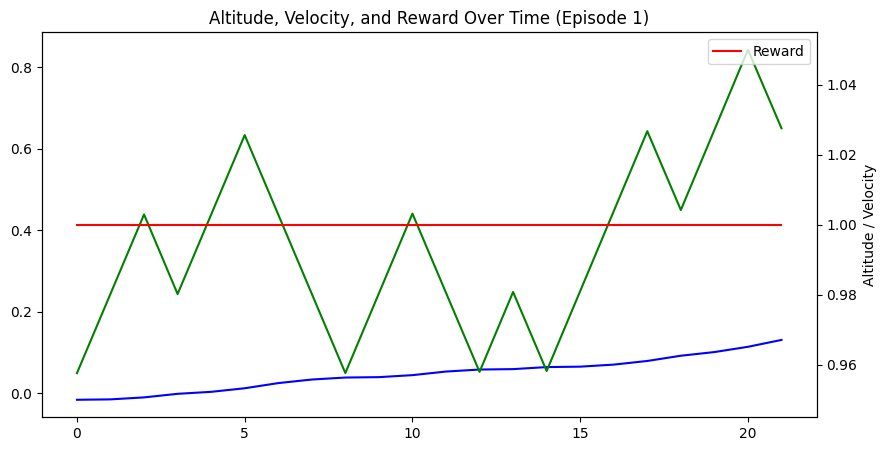

In [34]:
import matplotlib.pyplot as plt

# Extract altitude, velocity, and reward data from the collected episode data
altitude_data = [step[0] for step in altitude_velocity_reward_data[0]]  # Extracting altitude from the first episode
velocity_data = [step[1] for step in altitude_velocity_reward_data[0]]  # Extracting velocity from the first episode
reward_data = [step[3] for step in altitude_velocity_reward_data[0]]  # Extracting reward from the first episode

# Plot altitude and velocity
plt.figure(figsize=(10, 5))
plt.plot(altitude_data, label='Altitude', color='blue')
plt.plot(velocity_data, label='Velocity', color='green')

# Plot reward on secondary y-axis
plt.twinx()
plt.plot(reward_data, label='Reward', color='red')

# Set labels and title
plt.xlabel('Time Step')
plt.ylabel('Altitude / Velocity')
plt.title('Altitude, Velocity, and Reward Over Time (Episode 1)')
plt.legend()

# Show plot
plt.show()


In [35]:
import gym
import numpy as np
import csv

# Function to calculate reward based on the angle of the pole
def calculate_reward(angle):
    # Define reward thresholds based on angle
    if abs(angle) < 0.1:  # If the pole is close to vertical
        return 2
    elif abs(angle) < 0.5:  # If the pole is moderately tilted
        return 1
    else:  # If the pole is significantly tilted
        return 0

# Function to collect data for Angle, Angular Velocity, Orientation, and Reward
def collect_data(env, num_episodes):
    data = []

    for episode in range(num_episodes):
        observation = env.reset()
        episode_data = []

        while True:
            # Choose action using a random policy for data collection
            action = env.action_space.sample()

            # Take the chosen action and observe the next state and reward
            next_observation, _, done, _ = env.step(action)

            # Extract relevant data from the observation
            angle = observation[2]  # Extract angle (theta)
            angular_velocity = observation[3]  # Extract angular velocity (theta dot)
            orientation = 0 if angle < 0 else 1  # Simulated orientation based on angle sign

            # Calculate reward based on the angle of the pole
            reward = calculate_reward(angle)

            # Store the collected data
            episode_data.append((angle, angular_velocity, orientation, reward, action))

            observation = next_observation

            if done:
                data.append(episode_data)
                break

    return data

# Create the CartPole-v1 environment
env = gym.make('CartPole-v1')

# Set the number of episodes for data collection
num_episodes = 100

# Collect data for Angle, Angular Velocity, Orientation, and Reward
data = collect_data(env, num_episodes)

# Close the environment
env.close()

# Write collected data into a CSV file
csv_filename = ''
import numpy as np
import csv

# Function to calculate reward based on the angle of the pole
def calculate_reward(angle):
    # Define reward thresholds based on angle
    if abs(angle) < 0.1:  # If the pole is close to vertical
        return 2
    elif abs(angle) < 0.5:  # If the pole is moderately tilted
        return 1
    else:  # If the pole is significantly tilted
        return 0

# Function to collect data for Angle, Angular Velocity, Orientation, and Reward
def collect_data(env, num_episodes):
    data = []

    for episode in range(num_episodes):
        observation = env.reset()
        episode_data = []

        while True:
            # Choose action using a random policy for data collection
            action = env.action_space.sample()

            # Take the chosen action and observe the next state and reward
            next_observation, _, done, _ = env.step(action)

            # Extract relevant data from the observation
            angle = observation[2]  # Extract angle (theta)
            angular_velocity = observation[3]  # Extract angular velocity (theta dot)
            orientation = 0 if angle < 0 else 1  # Simulated orientation based on angle sign

            # Calculate reward based on the angle of the pole
            reward = calculate_reward(angle)

            # Store the collected data
            episode_data.append((angle, angular_velocity, orientation, reward, action))

            observation = next_observation

            if done:
                data.append(episode_data)
                break

    return data

# Create the CartPole-v1 environment
env = gym.make('CartPole-v1')

# Set the number of episodes for data collection
num_episodes = 100

# Collect data for Angle, Angular Velocity, Orientation, and Reward
data = collect_data(env, num_episodes)

# Close the environment
env.close()

# Write collected data into a CSV file
csv_filename = 'AngularVelocity_position_with_rewards.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Angle', 'Angular Velocity', 'Orientation', 'Reward', 'Action'])  # Write header
    for episode_data in data:
        for row in episode_data:
            writer.writerow(row)

print(f"Data has been saved to {csv_filename}")

with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Angle', 'Angular Velocity', 'Orientation', 'Reward', 'Action'])  # Write header
    for episode_data in data:
        for row in episode_data:
            writer.writerow(row)

print(f"Data has been saved to {csv_filename}")


Data has been saved to AngularVelocity_position_with_rewards.csv
Data has been saved to AngularVelocity_position_with_rewards.csv


Data has been saved to AngularVelocity_position_with_rewards.csv


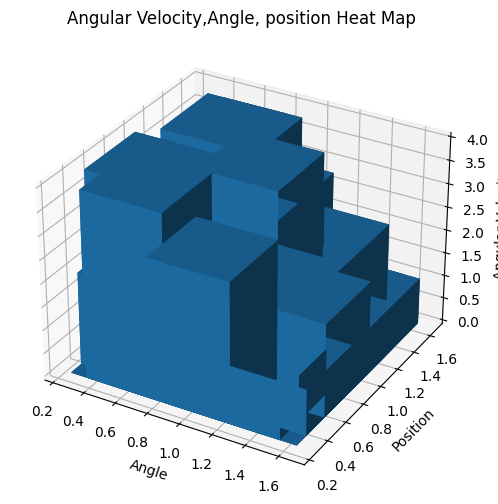

In [36]:

import gym
import numpy as np
import csv

# Function to calculate reward based on the angle of the pole
def calculate_reward(angle):
    # Define reward thresholds based on angle
    if abs(angle) < 0.1:  # If the pole is close to vertical
        return 2
    elif abs(angle) < 0.5:  # If the pole is moderately tilted
        return 1
    else:  # If the pole is significantly tilted
        return 0

# Function to collect data for Angle, Angular Velocity, Orientation, and Reward
def collect_data(env, num_episodes):
    data = []

    for episode in range(num_episodes):
        observation = env.reset()
        episode_data = []

        while True:
            # Choose action using a random policy for data collection
            action = env.action_space.sample()

            # Take the chosen action and observe the next state and reward
            next_observation, _, done, _ = env.step(action)

            # Extract relevant data from the observation
            angle = observation[2]  # Extract angle (theta)
            angular_velocity = observation[3]  # Extract angular velocity (theta dot)
            orientation = 0 if angle < 0 else 1  # Simulated orientation based on angle sign

            # Calculate reward based on the angle of the pole
            reward = calculate_reward(angle)

            # Store the collected data
            episode_data.append((angle, angular_velocity, orientation, reward, action))

            observation = next_observation

            if done:
                data.append(episode_data)
                break

    return data

# Create the CartPole-v1 environment
env = gym.make('CartPole-v1')

# Set the number of episodes for data collection
num_episodes = 100

# Collect data for Angle, Angular Velocity, Orientation, and Reward
data = collect_data(env, num_episodes)

# Close the environment
env.close()

# Write collected data into a CSV file
csv_filename = 'AngularVelocity_position_with_rewards.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Angle', 'Angular Velocity', 'Orientation', 'Reward', 'Action'])  # Write header
    for episode_data in data:
        for row in episode_data:
            writer.writerow(row)

print(f"Data has been saved to {csv_filename}")


# Plot the heatmap
import numpy as np
import matplotlib.pyplot as plt

# Assuming angular_velocity, angle, and Reward are loaded from the dataset

# Plot the heatmap
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
data = np.loadtxt('AngularVelocity_position_with_rewards.csv', delimiter=',', skiprows=1)

# Assuming the columns are arranged as: angular_velocity, angle, reward
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have data for x, y, and z coordinates
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D heatmap
hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

# Plot 3D bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', cmap='viridis')

# Set labels and title
ax.set_xlabel('Angle')
ax.set_ylabel('Position')
ax.set_zlabel('Angular Velocity')
ax.set_title('Angular Velocity,Angle, position Heat Map')

plt.show()






Data has been saved to Fuel_data_with_rewards.csv


<ipython-input-37-50a4f4be7faf>:89: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


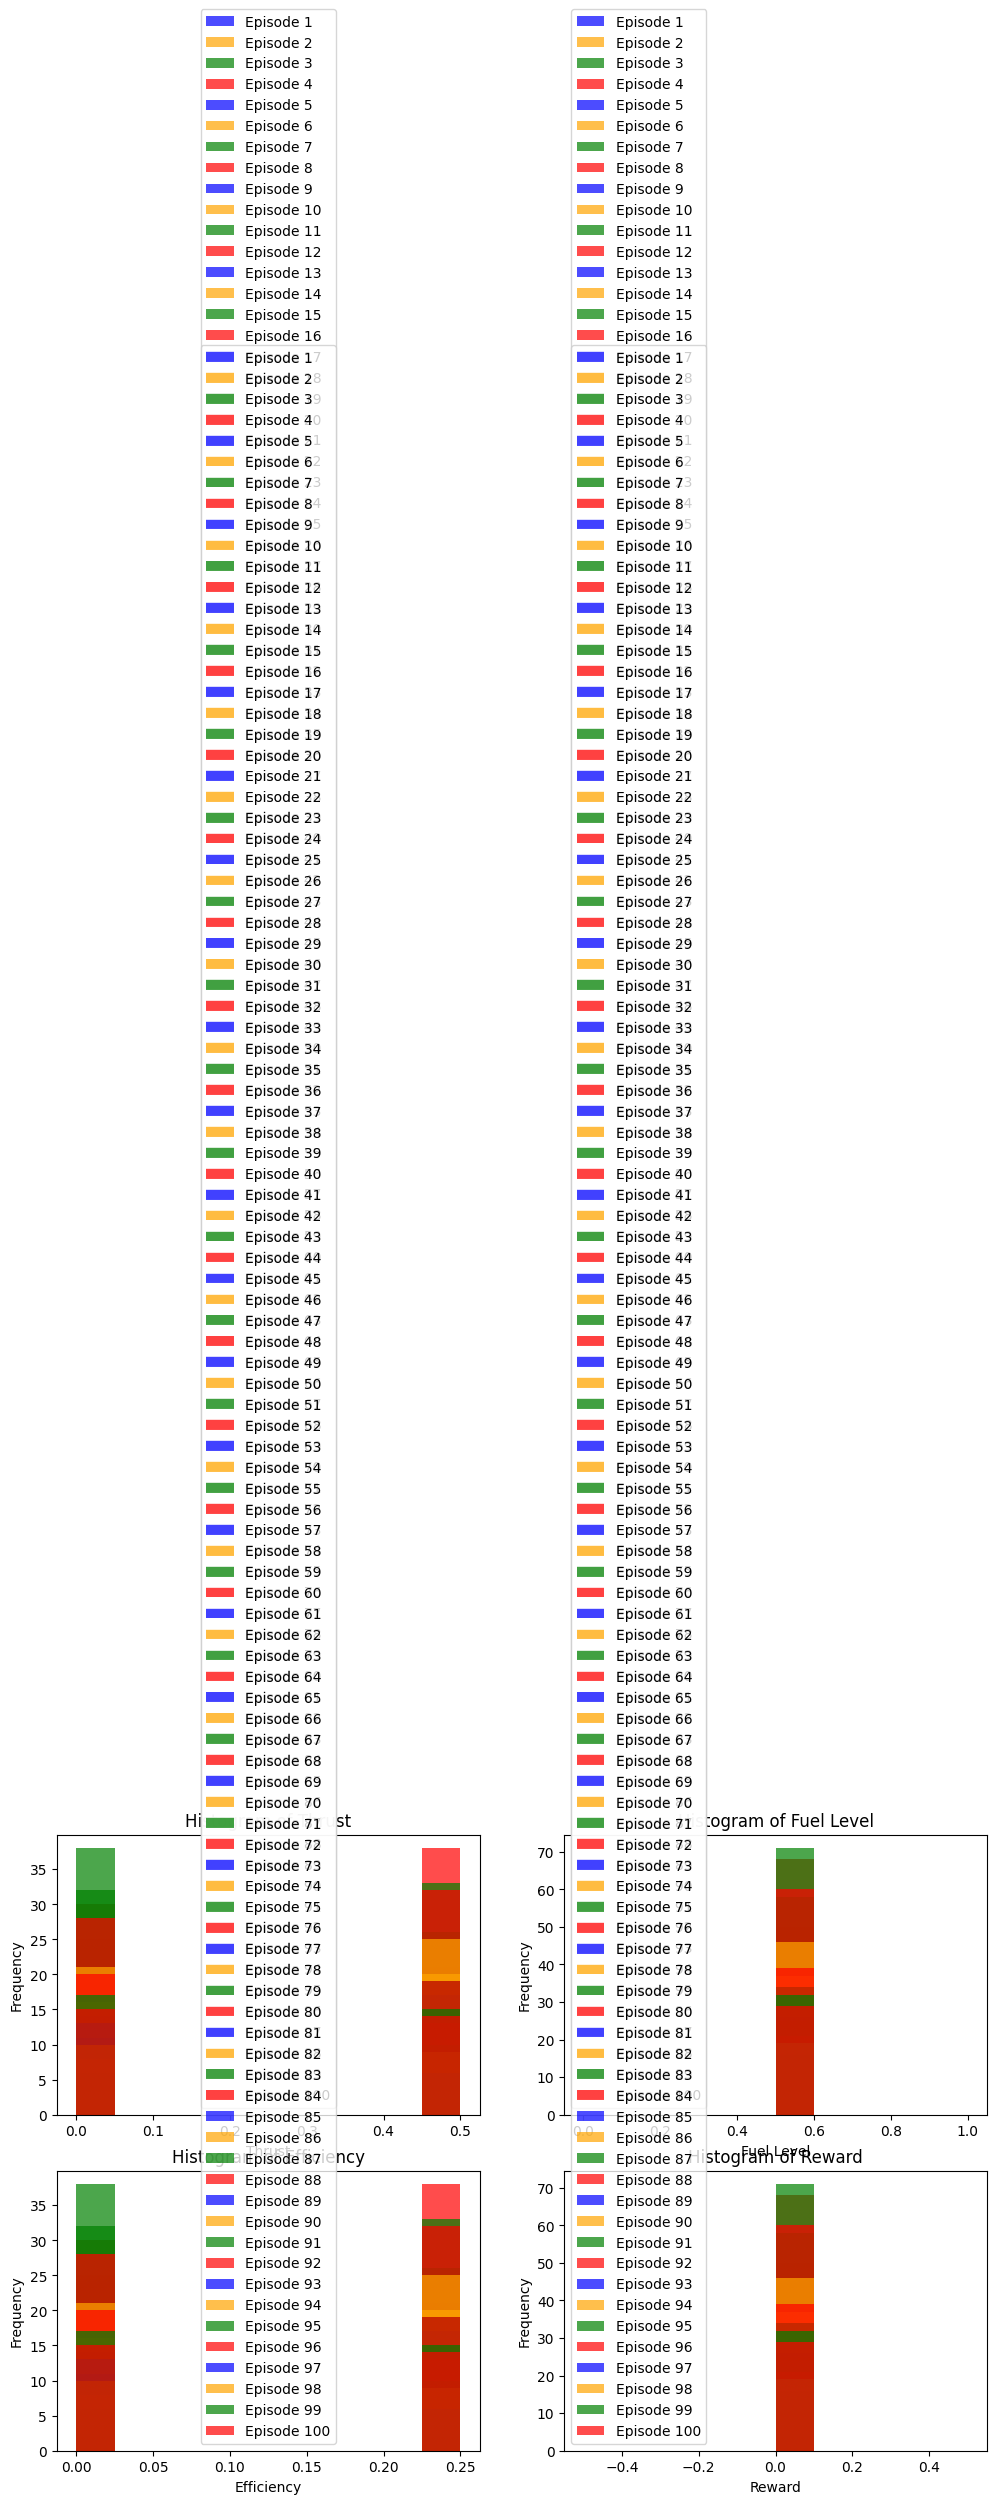

In [37]:
import gym
import numpy as np
import csv
import matplotlib.pyplot as plt

# Function to calculate reward based on the efficiency of the action
def calculate_reward(thrust, efficiency):
    if efficiency >= 0.8:
        return 2
    elif efficiency >= 0.5:
        return 1
    else:
        return 0

# Function to collect data for Thrust, Fuel Level, Efficiency, and Reward
def collect_data(env, num_episodes):
    data = []

    for episode in range(num_episodes):
        observation = env.reset()
        episode_data = []

        while True:
            action = env.action_space.sample()
            next_observation, _, done, _ = env.step(action)
            fuel_level = 0.5  # Example: Simulated fuel level
            thrust = action / 2  # Example: Simulated thrust based on action
            efficiency = fuel_level * thrust  # Example: Simulated efficiency
            reward = calculate_reward(thrust, efficiency)
            episode_data.append((thrust, fuel_level, efficiency, reward, action))
            observation = next_observation
            if done:
                data.append(episode_data)
                break

    return data

# Create the CartPole-v1 environment
env = gym.make('CartPole-v1')

# Set the number of episodes for data collection
num_episodes = 100

# Collect data for Thrust, Fuel Level, Efficiency, and Reward
data = collect_data(env, num_episodes)

# Close the environment
env.close()

# Write collected data into a CSV file
csv_filename = 'Fuel_data_with_rewards.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Thrust', 'Fuel Level', 'Efficiency', 'Reward', 'Action'])  # Write header
    for episode_data in data:
        for row in episode_data:
            writer.writerow(row)

print(f"Data has been saved to {csv_filename}")

# Plotting the collected data
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

labels = ['Thrust', 'Fuel Level', 'Efficiency', 'Reward']
colors = ['blue', 'orange', 'green', 'red']

for i in range(4):
    # Convert each episode's data to a NumPy array
    data_np = [np.array(episode_data) for episode_data in data]

    # Extract the ith column from each episode's data
    data_points = [episode_data[:, i] for episode_data in data_np]

    # Plot histogram for each column
    for j, column_data in enumerate(data_points):
        # Use modulo operation to cycle through colors if there are more episodes than colors
        color_index = j % len(colors)
        axes[i].hist(column_data, bins=10, color=colors[color_index], alpha=0.7, label=f'Episode {j+1}')

    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {labels[i]}')
    axes[i].legend()

plt.tight_layout()
plt.show()




In [38]:
import gym
import numpy as np
import csv
import matplotlib.pyplot as plt

# Function to calculate reward based on the efficiency of the action
def calculate_reward(thrust, efficiency):
    if efficiency >= 0.8:
        return 2
    elif efficiency >= 0.5:
        return 1
    else:
        return 0

# Function to collect data for Thrust, Fuel Level, Efficiency, and Reward
def collect_data(env, num_episodes):
    data = []

    for episode in range(num_episodes):
        observation = env.reset()
        episode_data = []

        while True:
            action = env.action_space.sample()
            next_observation, _, done, _ = env.step(action)
            fuel_level = 0.5  # Example: Simulated fuel level
            thrust = action / 2  # Example: Simulated thrust based on action
            efficiency = fuel_level * thrust  # Example: Simulated efficiency
            reward = calculate_reward(thrust, efficiency)
            episode_data.append((thrust, fuel_level, efficiency, reward, action))
            observation = next_observation
            if done:
                data.append(episode_data)
                break

    return data

# Create the CartPole-v1 environment
env = gym.make('CartPole-v1')

# Set the number of episodes for data collection
num_episodes = 100

# Collect data for Thrust, Fuel Level, Efficiency, and Reward
data = collect_data(env, num_episodes)

# Close the environment
env.close()

# Write collected data into a CSV file
csv_filename = 'cartpole_data_with_rewards.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Thrust', 'Fuel Level', 'Efficiency', 'Reward', 'Action'])  # Write header
    for episode_data in data:
        for row in episode_data:
            writer.writerow(row)

print(f"Data has been saved to {csv_filename}")

Data has been saved to cartpole_data_with_rewards.csv


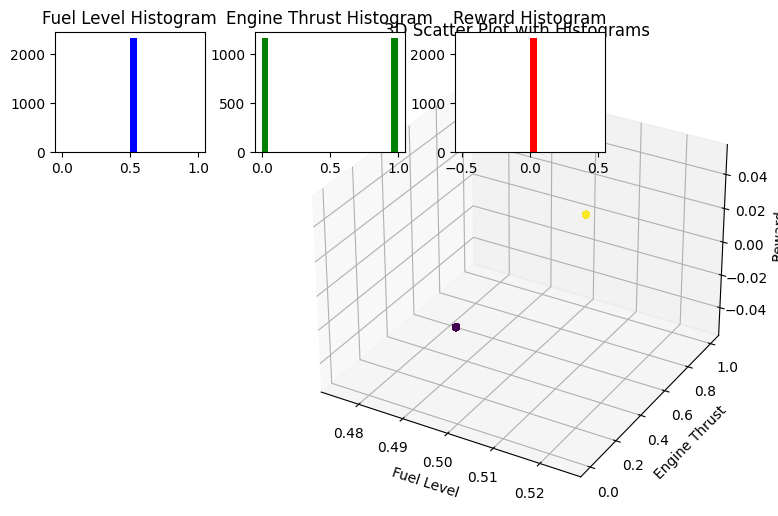

In [39]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the collected data from the CSV file
data = np.loadtxt('cartpole_data_with_rewards.csv', delimiter=',', skiprows=1)

# Extract Fuel Level, Engine Thrust, Frequency, and Reward data
fuel_level = data[:, 1]
engine_thrust = data[:, 4]
frequency = data[:, 2]
reward = data[:, 3]

# Filter data based on frequency range
filtered_indices = np.where((frequency >= 0) & (frequency <= 70))
fuel_level_filtered = fuel_level[filtered_indices]
engine_thrust_filtered = engine_thrust[filtered_indices]
reward_filtered = reward[filtered_indices]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for filtered data
ax.scatter(fuel_level_filtered, engine_thrust_filtered, reward_filtered, c=frequency[filtered_indices], cmap='viridis')

# Add histograms for each variable along the axes
ax_hist_fuel = fig.add_axes([0.05, 0.7, 0.15, 0.2])
ax_hist_fuel.hist(fuel_level_filtered, bins=20, color='blue')
ax_hist_fuel.set_title('Fuel Level Histogram')

ax_hist_thrust = fig.add_axes([0.25, 0.7, 0.15, 0.2])
ax_hist_thrust.hist(engine_thrust_filtered, bins=20, color='green')
ax_hist_thrust.set_title('Engine Thrust Histogram')

ax_hist_reward = fig.add_axes([0.45, 0.7, 0.15, 0.2])
ax_hist_reward.hist(reward_filtered, bins=20, color='red')
ax_hist_reward.set_title('Reward Histogram')

# Add labels and title
ax.set_xlabel('Fuel Level')
ax.set_ylabel('Engine Thrust')
ax.set_zlabel('Reward')
ax.set_title('3D Scatter Plot with Histograms')

plt.show()


plt.show()


In [40]:
import gym
import numpy as np
import csv

# Function to collect data for gravity, atmospheric density, and wind speed using reinforcement learning
def collect_data(env, num_episodes):
    data = []

    for episode in range(num_episodes):
        observation = env.reset()
        episode_data = []

        while True:
            # Choose action using a random policy for data collection
            action = env.action_space.sample()

            # Take the chosen action and observe the next state and reward
            next_observation, reward, done, _ = env.step(action)

            # Extract relevant data from the observation
            gravity = observation[0]  # Hypothetical parameter representing gravity
            density = observation[1]  # Hypothetical parameter representing atmospheric density
            wind_speed = observation[2]  # Hypothetical parameter representing wind speed

            # Store the collected data
            episode_data.append((gravity, density, wind_speed))

            observation = next_observation

            if done:
                data.append(episode_data)
                break

    return data

# Create the environment (replace 'YourEnvironment' with the actual environment name)
env = gym.make('CartPole-v1')

# Set the number of episodes for data collection
num_episodes = 100

# Collect data for gravity, atmospheric density, and wind speed
data = collect_data(env, num_episodes)

# Close the environment
env.close()

# Write collected data into a CSV file
csv_filename = 'environment_data.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Gravity', 'Atmospheric Density', 'Wind Speed'])  # Write header
    for episode_data in data:
        for row in episode_data:
            writer.writerow(row)

print(f"Data has been saved to {csv_filename}")


Data has been saved to environment_data.csv


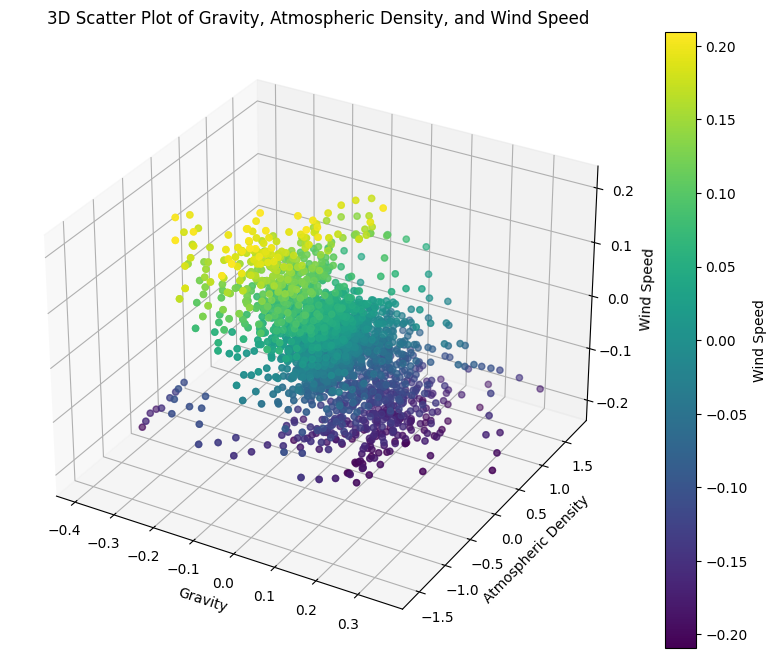

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the collected data from the CSV file
data = np.loadtxt('environment_data.csv', delimiter=',', skiprows=1)

# Extract gravity, atmospheric density, and wind speed data
gravity = data[:, 0]
density = data[:, 1]
wind_speed = data[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot gravity-density-wind_speed
ax.scatter(gravity, density, wind_speed, c=wind_speed, cmap='viridis')

# Add labels and title
ax.set_xlabel('Gravity')
ax.set_ylabel('Atmospheric Density')
ax.set_zlabel('Wind Speed')
ax.set_title('3D Scatter Plot of Gravity, Atmospheric Density, and Wind Speed')

# Add color bar
cbar = plt.colorbar(ax.scatter(gravity, density, wind_speed, c=wind_speed, cmap='viridis'), ax=ax, label='Wind Speed')

plt.show()


In [42]:
import numpy as np

# Load individual datasets
data1 = np.loadtxt('AngularVelocity_position_with_rewards.csv', delimiter=',', skiprows=1)
data2 = np.loadtxt('cartpole_data_with_rewards.csv', delimiter=',', skiprows=1)
data3 = np.loadtxt('environment_data.csv', delimiter=',', skiprows=1)




print("Merged dataset saved to MarsLander_data.csv")
import numpy as np

# Example data arrays with the same number of columns
data1 = np.random.rand(10, 3)  # Array with shape (10, 3)
data2 = np.random.rand(8, 3)   # Array with shape (8, 3)
data3 = np.random.rand(12, 3)  # Array with shape (12, 3)

# Concatenate datasets along axis 0
merged_data = np.concatenate((data1, data2, data3), axis=0)

# Save merged dataset to a new CSV file
np.savetxt('MarsLander_data.csv', merged_data, delimiter=',', header='Column1,Column2,Column3', comments='')

print("Merged data saved to 'merged_data.csv'.")



Merged dataset saved to MarsLander_data.csv
Merged data saved to 'merged_data.csv'.


In [43]:
from google.colab import files
np.savetxt('MarsLander_data.csv', merged_data, delimiter=',', header='Column1,Column2,Column3', comments='')
files.download('MarsLander_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
!pip install pyglet==1.5.27